In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# pip install seaborn

In [108]:
df = pd.read_csv("US_NaturalGas_data.csv")
df["Country"] = "USA"

In [109]:
df.head()

,Date,Price_Residential,Production,Imports,Exports,Consumption,Country
0,15/01/2001,10.12,2096948.0,373077.0,25547.0,2676998.0,USA
1,15/02/2001,10.26,1910051.0,328289.0,26882.0,2309464.0,USA
2,15/03/2001,9.85,2116381.0,358103.0,32121.0,2246633.0,USA
3,15/04/2001,10.16,2028145.0,318573.0,23637.0,1807170.0,USA
4,15/05/2001,11.14,2070749.0,321878.0,28981.0,1522382.0,USA


# Data Cleaning

In [110]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [111]:
df = df.convert_dtypes()
df.dtypes

Date                 datetime64[ns]
Price_Residential           Float64
Production                    Int64
Imports                       Int64
Exports                       Int64
Consumption                   Int64
Country                      string
dtype: object

In [112]:
df["Price_Residential"].isna().sum()

1

In [113]:
df.dropna(inplace=True)

In [114]:
df["Exports"].count()

252

In [115]:
def condition(x):
  return x == 0

print(sum(condition(x) for x in df["Exports"]))

0


In [116]:
sum(map(lambda x: x==0, df["Production"]))

0

In [117]:
def clean(x):
    if x <= 10:
        return 'Low Price'
    if (x > 10 and x < 16):
        return 'Medium Price'
    if x >= 16:
        return "High Price"
    return float(x)

df['Price_Category'] = df['Price_Residential'].apply(clean)
df["Price_Category"].unique()

array(['Medium Price', 'Low Price', 'High Price'], dtype=object)

# Data Exploratory

In [118]:
df.describe()

,Price_Residential,Production,Imports,Exports,Consumption
count,252.000000,2.520000e+02,252.000000,252.000000,2.520000e+02
mean,12.597500,2.478769e+06,288645.436508,164910.119048,2.117690e+06
std,3.064449,5.048118e+05,58465.345782,142818.208783,4.632164e+05
min,7.100000,1.766603e+06,174225.000000,23637.000000,1.368369e+06
25%,10.017500,2.047316e+06,238315.750000,64064.250000,1.742511e+06
50%,12.245000,2.357574e+06,282064.500000,117848.000000,2.067381e+06
75%,15.032500,2.759869e+06,334001.750000,205046.000000,2.403584e+06
max,20.980000,3.683216e+06,426534.000000,620988.000000,3.424302e+06


In [164]:
df["Price_Category"].value_counts(normalize=True)*100

Medium Price    57.142857
Low Price       24.206349
High Price      18.650794
Name: Price_Category, dtype: float64

In [135]:
df.pivot_table(index='Country', columns='Price_Category', values=['Price_Residential'], aggfunc='mean')

Price_Residential                       
Price_Category        High Price Low Price Medium Price
Country                                                
USA                    17.390213  9.125082    12.504167

In [150]:
df[(df.Price_Residential >= 10) & (df.Price_Category !="Medium Price") & (df.Consumption > 10000)].pivot_table(
    index='Price_Category', values=['Price_Residential'], aggfunc='mean')

,Price_Residential
Price_Category,
High Price,17.390213


In [171]:
df_sum = df.groupby("Price_Category").mean()["Imports"]
df_sum

Price_Category
High Price      263074.255319
Low Price       287149.540984
Medium Price    297625.263889
Name: Imports, dtype: Float64

In [201]:
df["Imports"].describe()

count       252.000000
mean     288645.436508
std       58465.345782
min      174225.000000
25%      238315.750000
50%      282064.500000
75%      334001.750000
max      426534.000000
Name: Imports, dtype: float64

In [205]:
df[(df['Imports'] > df["Imports"].quantile(0.25)) & (df['Exports'] > 
                                                    df["Exports"].quantile(0.25))]["Price_Category"].value_counts()

Medium Price    74
Low Price       37
High Price      15
Name: Price_Category, dtype: int64

In [175]:
df_sum.reset_index().sort_values(by="Price_Category", ascending=False).iloc[0:10]

,Price_Category,Imports
2,Medium Price,297625.263889
1,Low Price,287149.540984
0,High Price,263074.255319


In [120]:
df.corr()

,Price_Residential,Production,Imports,Exports,Consumption
Price_Residential,1.000000,0.103688,-0.135346,0.106819,-0.418950
Production,0.103688,1.000000,-0.770846,0.936609,0.549346
Imports,-0.135346,-0.770846,1.000000,-0.628983,-0.202241
Exports,0.106819,0.936609,-0.628983,1.000000,0.536727
Consumption,-0.418950,0.549346,-0.202241,0.536727,1.000000


# Data Visualization

<AxesSubplot:xlabel='Date'>

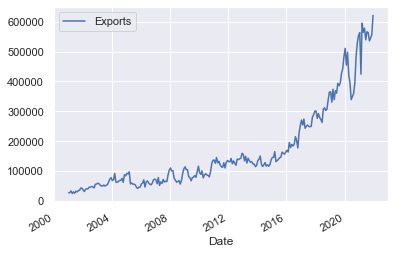

In [121]:
df.plot("Date", "Exports")

count    252.000000
mean      12.597500
std        3.064449
min        7.100000
25%       10.017500
50%       12.245000
75%       15.032500
max       20.980000
Name: Price_Residential, dtype: float64

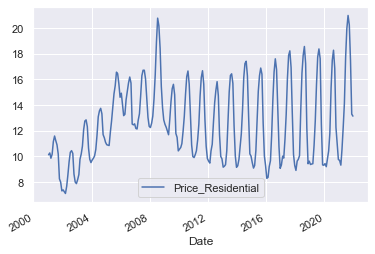

In [122]:
df.plot("Date", "Price_Residential")
df["Price_Residential"].describe()

<AxesSubplot:xlabel='Price_Category'>

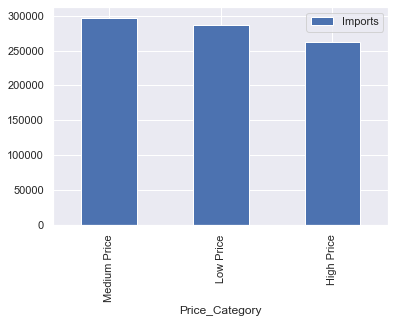

In [174]:
df_sum.reset_index().sort_values(by="Price_Category", ascending=False).iloc[0:10].plot(kind="bar",
                                                                                       x="Price_Category", y="Imports")

<AxesSubplot:>

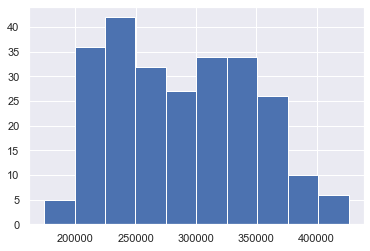

In [168]:
df["Imports"].hist()

<AxesSubplot:>

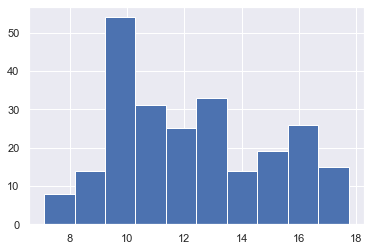

In [166]:
df[df["Price_Residential"] < df["Price_Residential"].quantile(0.95)]["Price_Residential"].hist()

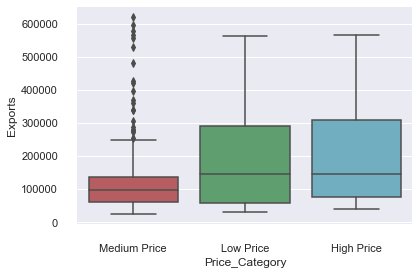

In [123]:
sns.boxplot(x="Price_Category", y="Exports",
            palette=["r", "g", "c"],
            data=df)
sns.despine(offset=10, trim=True)

<AxesSubplot:xlabel='Date', ylabel='Price_Residential'>

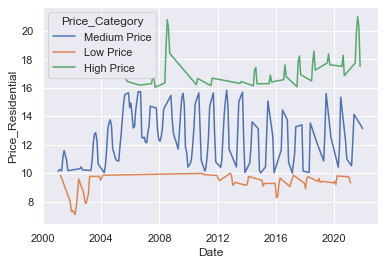

In [124]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="Date", y="Price_Residential",
             hue="Price_Category",
             data=df)

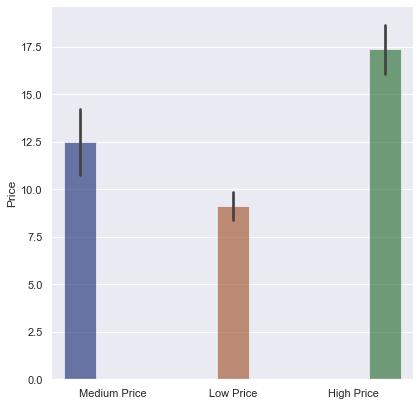

In [97]:
g = sns.catplot(
    data=df, kind="bar",
    x="Price_Category", y="Price_Residential", hue="Price_Category",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Price")

<AxesSubplot:xlabel='Exports', ylabel='Imports'>

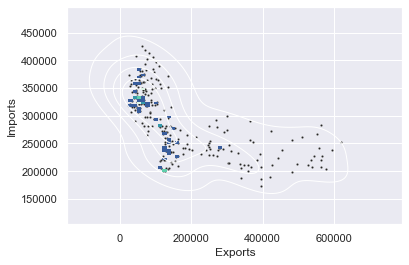

In [125]:
x = df["Exports"]
y = df["Imports"]

sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

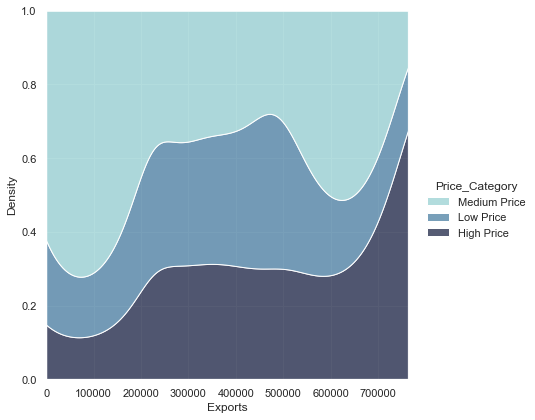

In [126]:
sns.displot(
    data=df,
    x="Exports", hue="Price_Category",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

<AxesSubplot:>

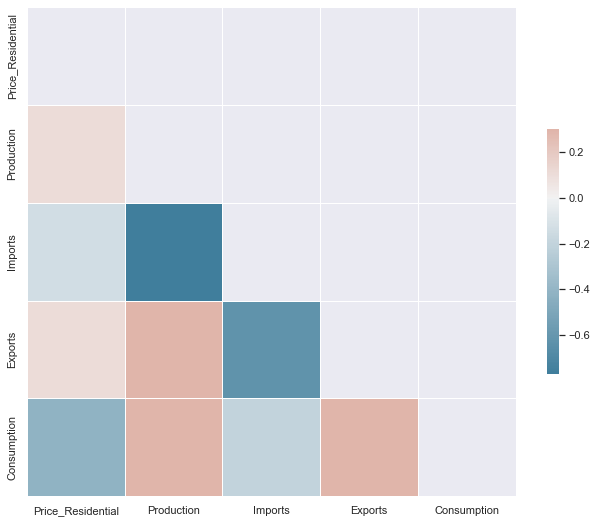

In [127]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,

            square=True, linewidths=.5, cbar_kws={"shrink": .5})